In [1]:
import pandas as pd
import numpy as np
# 모든 데이터 파일을 동시에 불러오기
file_paths = {
    'train': 'train.csv',
    'test': 'test.csv',
    'sample_submission': 'sample_submission.csv',
    'international_trade': 'international_trade.csv'
}

# 데이터프레임으로 불러오기
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# 각 데이터프레임의 처음 몇 줄 확인
dataframes_head = {name: df.head() for name, df in dataframes.items()}

dataframes_head['train'], dataframes_head['test'], dataframes_head['sample_submission'], dataframes_head['international_trade']


(                ID   timestamp item corporation location  supply(kg)  \
 0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
 1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
 2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
 3  TG_A_J_20190104  2019-01-04   TG           A        J     25000.0   
 4  TG_A_J_20190105  2019-01-05   TG           A        J     32352.0   
 
    price(원/kg)  
 0          0.0  
 1          0.0  
 2       1728.0  
 3       1408.0  
 4       1250.0  ,
                 ID   timestamp item corporation location
 0  TG_A_J_20230304  2023-03-04   TG           A        J
 1  TG_A_J_20230305  2023-03-05   TG           A        J
 2  TG_A_J_20230306  2023-03-06   TG           A        J
 3  TG_A_J_20230307  2023-03-07   TG           A        J
 4  TG_A_J_20230308  2023-03-08   TG           A        J,
                 ID  answer
 0  TG_A_J_20230304       0
 1  TG_A_J_20230305       0
 2  TG_A_J_2023030

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
international_trade=pd.read_csv('international_trade.csv')

### test 데이터 전처리

In [3]:

# 결측치 확인
missing_values = test_data.isnull().sum()

# 날짜 형식으로 변환
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])

# 범주형 데이터 인코딩을 위해 더미 변수 생성
test_data_encoded = pd.get_dummies(test_data, columns=['item', 'corporation', 'location'], drop_first=True)

# 변환된 데이터와 결측치 정보를 출력
test_data_encoded.head(), missing_values

# 'ID' 컬럼을 드랍합니다.
test_data_encoded.drop('ID', axis=1, inplace=True)

# 최종 전처리된 데이터 확인
test_data_encoded.head()



,timestamp,item_CB,item_CR,item_RD,item_TG,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_S
0,2023-03-04,0,0,0,1,0,0,0,0,0,0
1,2023-03-05,0,0,0,1,0,0,0,0,0,0
2,2023-03-06,0,0,0,1,0,0,0,0,0,0
3,2023-03-07,0,0,0,1,0,0,0,0,0,0
4,2023-03-08,0,0,0,1,0,0,0,0,0,0


In [4]:
# 데이터의 첫 5행을 출력하여 확인합니다.
train_data_head = train_data.head()
test_data_head = test_data.head()
international_trade_head = international_trade.head()

In [5]:
(train_data_head, test_data_head, international_trade_head)

(                ID   timestamp item corporation location  supply(kg)  \
 0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
 1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
 2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
 3  TG_A_J_20190104  2019-01-04   TG           A        J     25000.0   
 4  TG_A_J_20190105  2019-01-05   TG           A        J     32352.0   
 
    price(원/kg)  
 0          0.0  
 1          0.0  
 2       1728.0  
 3       1408.0  
 4       1250.0  ,
                 ID  timestamp item corporation location
 0  TG_A_J_20230304 2023-03-04   TG           A        J
 1  TG_A_J_20230305 2023-03-05   TG           A        J
 2  TG_A_J_20230306 2023-03-06   TG           A        J
 3  TG_A_J_20230307 2023-03-07   TG           A        J
 4  TG_A_J_20230308 2023-03-08   TG           A        J,
         기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지
 0  2019-01  토마토(신선한 것이나 냉장한 것으로

In [6]:
# 코드 셀 1: 기초 통계량 및 결측치 확인

# 기초 통계량 확인
train_stats = train_data.describe()
test_stats = test_data.describe()
international_trade_stats = international_trade.describe()

# 결측치 확인
train_null = train_data.isnull().sum()
test_null = test_data.isnull().sum()
international_trade_null = international_trade.isnull().sum()

(train_stats, test_stats, international_trade_stats), (train_null, test_null, international_trade_null)


C:\Users\82106\AppData\Local\Temp\ipykernel_13060\305701395.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  test_stats = test_data.describe()


((         supply(kg)   price(원/kg)
  count  5.939700e+04  59397.000000
  mean   1.189453e+04   1131.680674
  std    5.226400e+04   2029.941445
  min    0.000000e+00      0.000000
  25%    0.000000e+00      0.000000
  50%    0.000000e+00      0.000000
  75%    3.800000e+03   1519.000000
  max    1.222800e+06  20909.000000,
                       ID            timestamp  item corporation location
  count              1092                 1092  1092        1092     1092
  unique             1092                   28     5           6        2
  top     TG_A_J_20230304  2023-03-04 00:00:00    TG           A        J
  freq                  1                   39   280         252      644
  first               NaN  2023-03-04 00:00:00   NaN         NaN      NaN
  last                NaN  2023-03-31 00:00:00   NaN         NaN      NaN,
                수출 중량         수출 금액         수입 중량         수입 금액          무역수지
  count  1.274000e+03   1274.000000  1.274000e+03   1274.000000   1274.000000


C:\Users\82106\AppData\Local\Temp\ipykernel_13060\3603503826.py:26: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


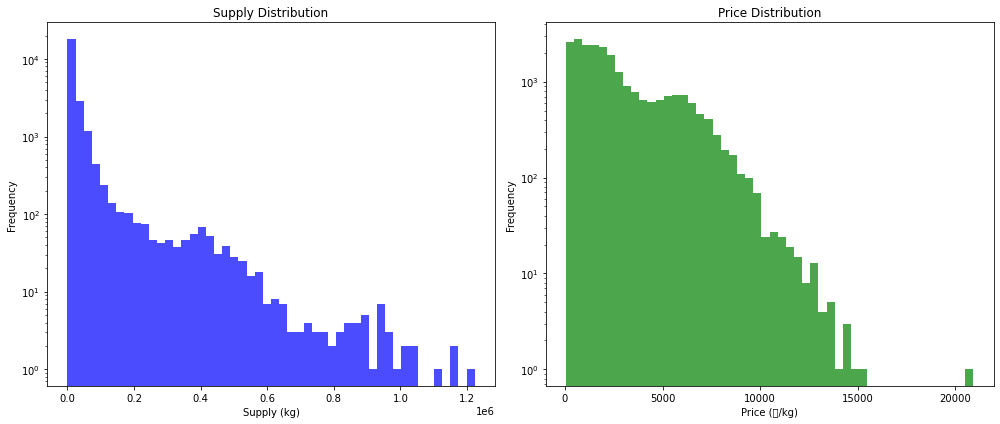

In [7]:
# 코드 셀 2: 공급량과 가격의 분포 시각화

# 필요한 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt

# 가격이 0보다 큰 행만 필터링합니다.
filtered_train_data = train_data[train_data['price(원/kg)'] > 0]

# 공급량과 가격에 대한 히스토그램을 그립니다.
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 공급량 히스토그램
ax[0].hist(filtered_train_data['supply(kg)'], bins=50, color='blue', alpha=0.7)
ax[0].set_title('Supply Distribution')
ax[0].set_xlabel('Supply (kg)')
ax[0].set_ylabel('Frequency')
ax[0].set_yscale('log') # 로그 스케일

# 가격 히스토그램
ax[1].hist(filtered_train_data['price(원/kg)'], bins=50, color='green', alpha=0.7)
ax[1].set_title('Price Distribution')
ax[1].set_xlabel('Price (원/kg)')
ax[1].set_ylabel('Frequency')
ax[1].set_yscale('log') # 로그 스케일

plt.tight_layout()
plt.show()


In [8]:

# 필요한 라이브러리를 임포트합니다.
from sklearn.model_selection import train_test_split

# 가격과 공급량에 대한 백분위수를 계산합니다.
percentiles = [0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]
supply_percentiles = filtered_train_data['supply(kg)'].quantile(percentiles).to_dict()
price_percentiles = filtered_train_data['price(원/kg)'].quantile(percentiles).to_dict()

# 이상치를 제거합니다.
train_data_filtered = filtered_train_data[
    (filtered_train_data['supply(kg)'] <= supply_percentiles[0.99]) &
    (filtered_train_data['price(원/kg)'] <= price_percentiles[0.99])]

# 훈련 데이터에서 독립 변수와 종속 변수를 분리합니다.
X_train = train_data_filtered.drop(columns=['price(원/kg)', 'ID', 'timestamp'])
y_train = train_data_filtered['price(원/kg)']

# 더미 변수를 생성합니다.
X_train = pd.get_dummies(X_train, columns=['item', 'corporation', 'location'])

# 훈련 데이터와 검증 데이터로 분리합니다.
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 결과를 확인합니다.
supply_percentiles, price_percentiles, X_train_split.head(), y_train_split.head()


({0.01: 64.0,
  0.05: 200.0,
  0.25: 1536.25,
  0.5: 7061.5,
  0.75: 23622.25,
  0.95: 112822.15000000002,
  0.99: 435891.8},
 {0.01: 284.0,
  0.05: 372.0,
  0.25: 999.0,
  0.5: 2031.5,
  0.75: 4189.75,
  0.95: 7419.0,
  0.99: 9504.720000000001},
        supply(kg)  item_BC  item_CB  item_CR  item_RD  item_TG  corporation_A  \
 41540      4300.0        0        0        0        1        0              0   
 53997      4616.0        1        0        0        0        0              0   
 20209     19860.0        0        0        1        0        0              0   
 11210      1361.0        0        0        0        0        1              0   
 562         715.0        0        0        0        0        1              1   
 
        corporation_B  corporation_C  corporation_D  corporation_E  \
 41540              0              0              0              1   
 53997              0              0              0              1   
 20209              0              0             

In [9]:
# 코드 셀 4: 데이터 정렬 및 날짜 타입 변환

# 날짜를 datetime 형식으로 변환합니다.
train_data_filtered['timestamp'] = pd.to_datetime(train_data_filtered['timestamp'])

# 날짜에 따라 데이터를 정렬합니다.
sorted_train_data = train_data_filtered.sort_values(by='timestamp')

# 정렬된 데이터의 첫 5행을 출력하여 확인합니다.
sorted_train_data_head = sorted_train_data.head()
sorted_train_data_head


C:\Users\82106\AppData\Local\Temp\ipykernel_13060\2750504962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_filtered['timestamp'] = pd.to_datetime(train_data_filtered['timestamp'])


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
31985,RD_A_J_20190103,2019-01-03,RD,A,J,37060.0,367.0
33508,RD_A_S_20190103,2019-01-03,RD,A,S,20440.0,414.0
48738,BC_C_J_20190103,2019-01-03,BC,C,J,800.0,2079.0
27416,CB_A_S_20190103,2019-01-03,CB,A,S,3168.0,510.0


In [10]:

# 모델 훈련 및 평가 코드를 가져와서 실행합니다.

# 필요한 라이브러리를 임포트합니다.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 랜덤 포레스트 회귀 모델을 훈련합니다.
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_split, y_train_split)

# 검증 데이터셋에서의 예측을 수행합니다.
y_val_pred = rf_model.predict(X_val_split)

# 평균 제곱근 오차(RMSE)를 계산합니다.
rmse = mean_squared_error(y_val_split, y_val_pred, squared=False)

# 모델 성능을 출력합니다.
rmse


997.5295795514171

In [11]:
from sklearn.metrics import r2_score

# R^2 (결정 계수)를 계산합니다.
r2 = r2_score(y_val_split, y_val_pred)

# R^2 값은 모델이 데이터의 분산을 얼마나 잘 설명하는지를 나타냅니다.
r2


0.7963105587608528

In [12]:
from sklearn.model_selection import RandomizedSearchCV

# 랜덤 포레스트 모델의 하이퍼파라미터 범위를 정의합니다.
param_distributions_reduced = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# RandomizedSearchCV를 초기화합니다. n_iter는 조합할 하이퍼파라미터 수를 줄이고,
# cv도 줄여서 빠르게 결과를 얻을 수 있도록 설정합니다.
rf_random_search_reduced = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_distributions_reduced,
    n_iter=5,
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# RandomizedSearchCV를 훈련 데이터에 대해 다시 실행합니다.
rf_random_search_reduced.fit(X_train_split, y_train_split)

# 최적의 하이퍼파라미터를 출력합니다.
best_params_reduced = rf_random_search_reduced.best_params_
best_params_reduced


Fitting 2 folds for each of 5 candidates, totalling 10 fits


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'bootstrap': True}

In [13]:
test_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      1092 non-null   datetime64[ns]
 1   item_CB        1092 non-null   uint8         
 2   item_CR        1092 non-null   uint8         
 3   item_RD        1092 non-null   uint8         
 4   item_TG        1092 non-null   uint8         
 5   corporation_B  1092 non-null   uint8         
 6   corporation_C  1092 non-null   uint8         
 7   corporation_D  1092 non-null   uint8         
 8   corporation_E  1092 non-null   uint8         
 9   corporation_F  1092 non-null   uint8         
 10  location_S     1092 non-null   uint8         
dtypes: datetime64[ns](1), uint8(10)
memory usage: 19.3 KB


In [14]:
# 최적의 하이퍼파라미터로 랜덤 포레스트 모델을 초기화합니다.
rf_model_tuned = RandomForestRegressor(
    n_estimators=best_params_reduced['n_estimators'],
    min_samples_split=best_params_reduced['min_samples_split'],
    min_samples_leaf=best_params_reduced['min_samples_leaf'],
    max_depth=best_params_reduced['max_depth'],
    bootstrap=best_params_reduced['bootstrap'],
    random_state=42
)

# 모델을 훈련 데이터에 맞추어 훈련합니다.
rf_model_tuned.fit(X_train_split, y_train_split)

# 검증 데이터에 대한 예측을 수행합니다.
y_val_pred_tuned = rf_model_tuned.predict(X_val_split)

# 평균 제곱 오차(MSE)를 계산합니다.
mse_tuned = mean_squared_error(y_val_split, y_val_pred_tuned)

mse_tuned


871424.2935291417

In [15]:
from sklearn.metrics import r2_score

# 검증 데이터에 대한 R^2 점수를 계산합니다.
r2_score_val_tuned = r2_score(y_val_split, y_val_pred_tuned)

r2_score_val_tuned


0.8216198130963452

In [16]:
from xgboost import XGBRegressor

# XGBoost 모델을 초기화하고 훈련을 위한 하이퍼파라미터를 설정합니다.
# n_estimators를 줄이고 early_stopping_rounds를 사용하여 조기 중단을 설정합니다.
xgb_model_reduced = XGBRegressor(
    n_estimators=100,  # 트리의 개수를 줄임
    random_state=42,
    verbosity=0  # 출력 메시지 제어
)

# 조기 중단을 위한 평가 세트를 설정합니다.
eval_set = [(X_val_split, y_val_split)]

# 모델을 훈련합니다.
xgb_model_reduced.fit(
    X_train_split,
    y_train_split,
    early_stopping_rounds=10,  # 10 라운드 동안 성능 향상이 없으면 조기 중단
    eval_set=eval_set,
    verbose=False  # 훈련 과정 중 메시지 출력을 하지 않습니다.
)

# 검증 데이터셋에서의 예측을 수행합니다.
y_val_pred_xgb_reduced = xgb_model_reduced.predict(X_val_split)

# 평균 제곱근 오차(RMSE)를 계산합니다.
rmse_xgb_reduced = mean_squared_error(y_val_split, y_val_pred_xgb_reduced, squared=False)

# R^2 (결정 계수)를 계산합니다.
r2_xgb_reduced = r2_score(y_val_split, y_val_pred_xgb_reduced)

rmse_xgb_reduced, r2_xgb_reduced


C:\Users\82106\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


(858.8400388896616, 0.8490123181024123)

In [17]:
# 최종 예측을 위해 테스트 데이터를 준비합니다.

# 이미 훈련 데이터셋에서 사용한 동일한 전처리를 적용해야 합니다.
# 테스트 데이터에서 더미 변수 생성
X_test = dataframes['test'].drop(columns=['ID', 'timestamp'])
X_test = pd.get_dummies(X_test, columns=['item', 'corporation', 'location'])

# 훈련 데이터에 있는 모든 더미 변수가 테스트 데이터에도 포함되도록 합니다.
X_test_aligned = X_train.align(X_test, join='left', axis=1, fill_value=0)[1]

# XGBoost 모델을 사용하여 테스트 데이터셋에 대한 최종 예측을 수행합니다.
y_test_pred = xgb_model_reduced.predict(X_test_aligned)

# 예측된 값들을 확인합니다.
y_test_pred[:10]  # 처음 10개의 예측값을 출력합니다.



array([6038.4106, 6038.4106, 6038.4106, 6038.4106, 6038.4106, 6038.4106,
       6038.4106, 6038.4106, 6038.4106, 6038.4106], dtype=float32)

In [20]:
import pandas as pd

# sample_submission.csv 파일을 로드합니다.
sample_submission = pd.read_csv('sample_submission.csv')


# 테스트 데이터셋에 대한 예측을 수행합니다.
y_test_pred = xgb_model_reduced.predict(X_test)

# 예측 결과를 sample_submission 데이터프레임의 'price(원/kg)' 컬럼에 저장합니다.
sample_submission['price(원/kg)'] = y_test_pred

# 완성된 제출 파일을 CSV 파일로 저장합니다.
submission_file_path = 'submission_2.csv'
sample_submission.to_csv(submission_file_path, index=False)


ValueError: feature_names mismatch: ['supply(kg)', 'item_BC', 'item_CB', 'item_CR', 'item_RD', 'item_TG', 'corporation_A', 'corporation_B', 'corporation_C', 'corporation_D', 'corporation_E', 'corporation_F', 'location_J', 'location_S'] ['item_BC', 'item_CB', 'item_CR', 'item_RD', 'item_TG', 'corporation_A', 'corporation_B', 'corporation_C', 'corporation_D', 'corporation_E', 'corporation_F', 'location_J', 'location_S']
expected supply(kg) in input data